In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Generate the data

- One feature X


- True parameters of Linear Regressions (slope & intercept). 


- Using a Uniform distribution to generate data, all values between the distribution's limits have the same probability.


- Add a little noise to the target (so, it's not a perfect relationship)



In [23]:
# 1. Generate synthetic data with outliers ()
np.random.seed(42)

# True parameters
true_slope = 2.0
true_intercept = 5.0
n_samples = 200
outlier_ratio = 0.25  # 25% outliers

# Generate inlier data
x = np.random.uniform(0, 10, n_samples)
y_clean = true_slope * x + true_intercept
noise = np.random.normal(0, 2, n_samples)  # Add Gaussian noise
y = y_clean + noise

In [7]:
np.mean(x), np.median(x), np.std(x), np.min(x), np.max(x)

(4.840062332666162,
 4.944862532378305,
 2.9415327874965107,
 0.05522117123602399,
 9.868869366005173)

In [8]:
# Target before adding Outliers

np.mean(y), np.median(y), np.std(y), np.min(y), np.max(y)

(14.81495319998503,
 14.287804704699045,
 6.148777096053468,
 2.986614626211813,
 27.268338873788863)

In [11]:
len(y)

200

# Add Outliers


- Uniform distribution that adds values between -25 and 25 to the target y 

In [24]:
# Add outliers
n_outliers = int(n_samples * outlier_ratio)
outlier_indices = np.random.choice(n_samples, n_outliers, replace=False)
y[outlier_indices] += np.random.uniform(-45, 45, n_outliers)  # Add large noise

In [13]:
# Target after adding Outliers

np.mean(y), np.median(y), np.std(y), np.min(y), np.max(y)

(13.470564504396469,
 13.172623115440594,
 9.326897140508239,
 -14.491500918104144,
 44.00515755951508)

In [16]:
x.shape

(200,)

## Sklearn expects X to be two dimensional 

In [25]:
# Reshape x for sklearn
X = x.reshape(-1, 1)

X.shape

(200, 1)

In [19]:
X

array([[3.74540119],
       [9.50714306],
       [7.31993942],
       [5.98658484],
       [1.5601864 ],
       [1.5599452 ],
       [0.58083612],
       [8.66176146],
       [6.01115012],
       [7.08072578],
       [0.20584494],
       [9.69909852],
       [8.32442641],
       [2.12339111],
       [1.81824967],
       [1.8340451 ],
       [3.04242243],
       [5.24756432],
       [4.31945019],
       [2.9122914 ],
       [6.11852895],
       [1.39493861],
       [2.92144649],
       [3.66361843],
       [4.56069984],
       [7.85175961],
       [1.99673782],
       [5.14234438],
       [5.92414569],
       [0.46450413],
       [6.07544852],
       [1.70524124],
       [0.65051593],
       [9.48885537],
       [9.65632033],
       [8.08397348],
       [3.04613769],
       [0.97672114],
       [6.84233027],
       [4.40152494],
       [1.22038235],
       [4.9517691 ],
       [0.34388521],
       [9.09320402],
       [2.58779982],
       [6.62522284],
       [3.11711076],
       [5.200

# Fit both models (OLS, RANSAC)

In [26]:
# 2. Fit models
# Classical Linear Regression
lr = LinearRegression()
lr.fit(X, y)
y_pred_lr = lr.predict(X)


# RANSAC Regression
ransac = RANSACRegressor(residual_threshold=7.0, random_state=42)
ransac.fit(X, y)
y_pred_ransac = ransac.predict(X)

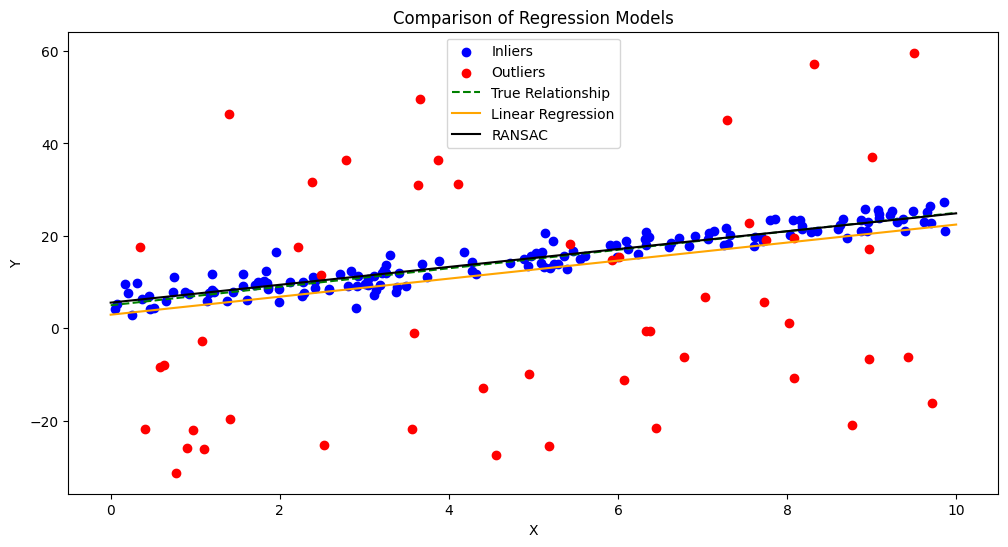

Classical Linear Regression:
MSE: 164.74, R²: 0.17
Slope: 1.95, Intercept: 2.96

RANSAC Regression:
MSE: 171.10, R²: 0.13
Slope: 1.93, Intercept: 5.57



In [27]:




# 3. Calculate metrics
mse_lr = mean_squared_error(y, y_pred_lr)
mse_ransac = mean_squared_error(y, y_pred_ransac)
r2_lr = r2_score(y, y_pred_lr)
r2_ransac = r2_score(y, y_pred_ransac)

# 4. Visualize results
plt.figure(figsize=(12, 6))

# Plot inliers and outliers
inlier_mask = np.ones_like(y, dtype=bool)
inlier_mask[outlier_indices] = False
plt.scatter(x[inlier_mask], y[inlier_mask], c='b', label='Inliers')
plt.scatter(x[outlier_indices], y[outlier_indices], c='r', label='Outliers')

# Plot true line
x_vals = np.array([0, 10])
y_true = true_slope * x_vals + true_intercept
plt.plot(x_vals, y_true, 'g--', label='True Relationship')

# Plot regression lines
plt.plot(x_vals, lr.predict(x_vals.reshape(-1, 1)), 'orange', label='Linear Regression')
plt.plot(x_vals, ransac.predict(x_vals.reshape(-1, 1)), 'k', label='RANSAC')

plt.legend()
plt.title('Comparison of Regression Models')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

# 5. Print metrics and explanations
print(f"Classical Linear Regression:")
print(f"MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")
print(f"Slope: {lr.coef_[0]:.2f}, Intercept: {lr.intercept_:.2f}\n")

print(f"RANSAC Regression:")
print(f"MSE: {mse_ransac:.2f}, R²: {r2_ransac:.2f}")
print(f"Slope: {ransac.estimator_.coef_[0]:.2f}, Intercept: {ransac.estimator_.intercept_:.2f}\n")